<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-Parte-3-nov2021/blob/main/2_Machine_Learning_Aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning: Aprendizaje no supervisado
##Clustering particional
##K-medias


Creamos un grupo de 40 puntos distribuidos aleatoriamente con una distribución normal, alrededor del punto (0,0) y con factor de escala 1.25

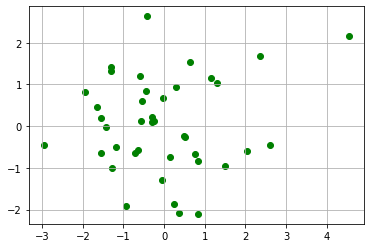

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
MAXN = 40
A=1.25*np.random.randn(MAXN,2)
plt.scatter(A[:,0], A[:,1], color='g')
plt.grid()

Creamos otro grupo de puntos aleatorios alrededor del (5, 5) y con factor de escala 1.5

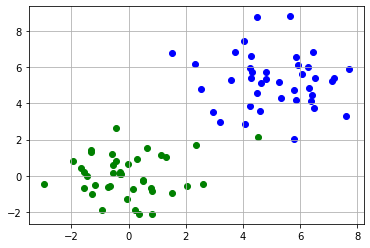

In [18]:
B=5+1.5*np.random.randn(MAXN,2)
plt.scatter(A[:,0], A[:,1], color='g')
plt.scatter(B[:,0], B[:,1], color='b')
plt.grid()

Creamos un tercer grupo de puntos aleatorios alrededor del punto (8,3) y con factor de escala 1.0

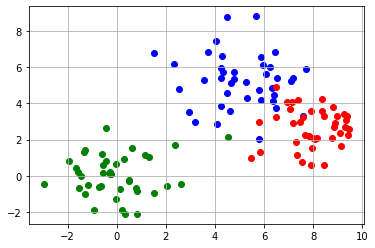

In [19]:
C=[8,3]+1*np.random.randn(MAXN,2)
plt.scatter(A[:,0], A[:,1], color='g')
plt.scatter(B[:,0], B[:,1], color='b')
plt.scatter(C[:,0], C[:,1], color='r')
plt.grid()

Creamos una matriz que contenga 3 grupos de puntos aleatorios con distribución normal a los que aplicamos distintos puntos base y escalas

In [20]:
X = np.concatenate([A, B, C])
#X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2), [8,3]+1*np.random.randn(MAXN,2)])

Podemos ver con el color de los puntos a qué clase pertenecen cuando se generan

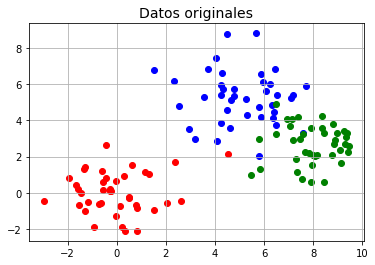

In [21]:
#Para poder visualizarlos con distinto color creamos unas matrices de máscara con números 1, 2 y 3
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1)), 3*np.ones((MAXN,1))])

fig = plt.plot()
plt.scatter(X[(y==1).ravel(),0], X[(y==1).ravel(),1], color='r')
plt.scatter(X[(y==2).ravel(),0], X[(y==2).ravel(),1], color='b')
plt.scatter(X[(y==3).ravel(),0], X[(y==3).ravel(),1], color='g')
plt.title('Datos originales', size=14)
plt.grid()

In [23]:
M = np.array([[1, 2, 3], [4, 5, 6]])
np.ravel(M)

array([1, 2, 3, 4, 5, 6])

In [24]:
M.reshape(-1)

array([1, 2, 3, 4, 5, 6])

Aplicamos un modemo de clasificación no supervisado: K-Means o K-medias.

Entrenamos el modelo con los datos de la matriz X

In [25]:
from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

Representamos visualmente la clasificación del espacio bidimensional que realiza nuestro modelo una vez entrenado. Para ello creamos una malla de puntos y aplicamos el modelo con predict() 

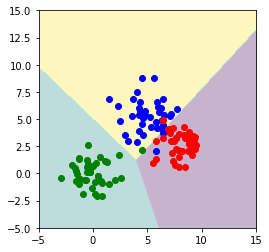

In [26]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='g')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r')

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

Podemos ver con el color de los puntos a qué clase pertenecen cuando se generan, y el color de fondo determina cómo particiona K-medias el espacio de asignación.

A continuación simularemos manualmente el proceso de convergencia de K-medias. Primero elegiríamos unos centros al azar y asociaríamos todos los datos al centro más cercano.

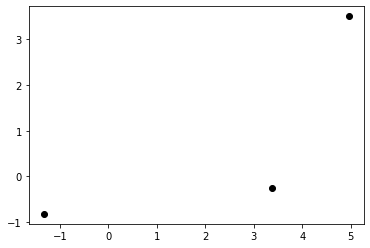

In [38]:
from sklearn import cluster
from scipy.spatial.distance import cdist
K=3

#Select the three centroids: the first three elements of the data
C=X[:3,:]

plt.scatter(C[:,0], C[:,1], color='black')

Dividimos el espacio en función de la distancia a los 3 centroides que hemos definido inicialmente

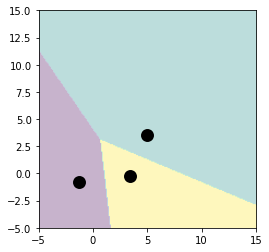

In [40]:
plt.scatter(C[:,0],C[:,1],s=120, 
           color='black', 
           linewidths=2,
           zorder=10)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y,axis=1)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)


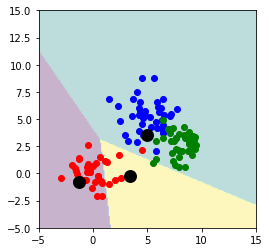

In [41]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, 
           color='black', 
           linewidths=2,
           zorder=10)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

Calculamos los nuevos centroides

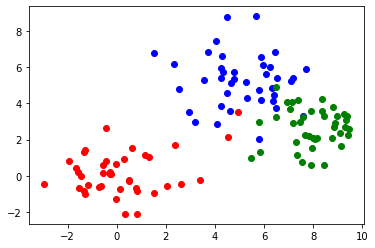

In [32]:
#Compute membership for next iteration
Y = cdist(X, C, 'euclidean')
y_pred = np.argmin(Y,axis=1)

#Update centroids
for i in range(K):
    C[i,:]=np.mean(X[y_pred==i,:],axis=0)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)


Y repetimos la asignación de puntos a los centros más cercanos.


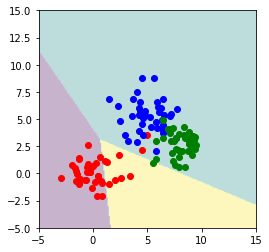

In [33]:
#And the new area of influence
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y,axis=1)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)


Repetimos estos dos procesos hasta converger.


##La técnica del codo
Hagamos ese análisis de distancias con el ejemplo anterior, analizando las distancias al incrementar el número de clusters.


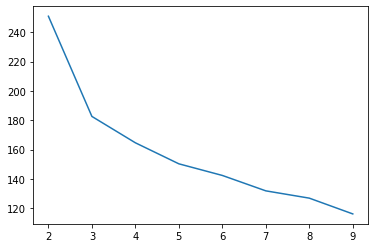

In [9]:
from scipy.spatial import distance
from sklearn import cluster
d=[]
for K in range(2,10):
    clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
    clf.fit(X)
    y_pred = clf.predict(X)
    p=[]
    for i in range(K):
        p.append(np.sum(distance.cdist(X[y_pred==i,:],[clf.cluster_centers_[i]],'euclidean')))
    d.append(np.sum(p))
plt.plot(np.arange(2,10),d)


##Clustering jerárquico


(30, 2)


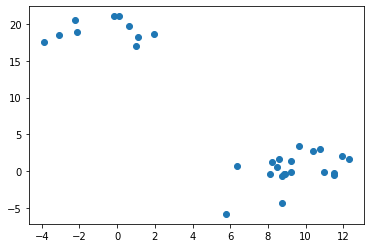

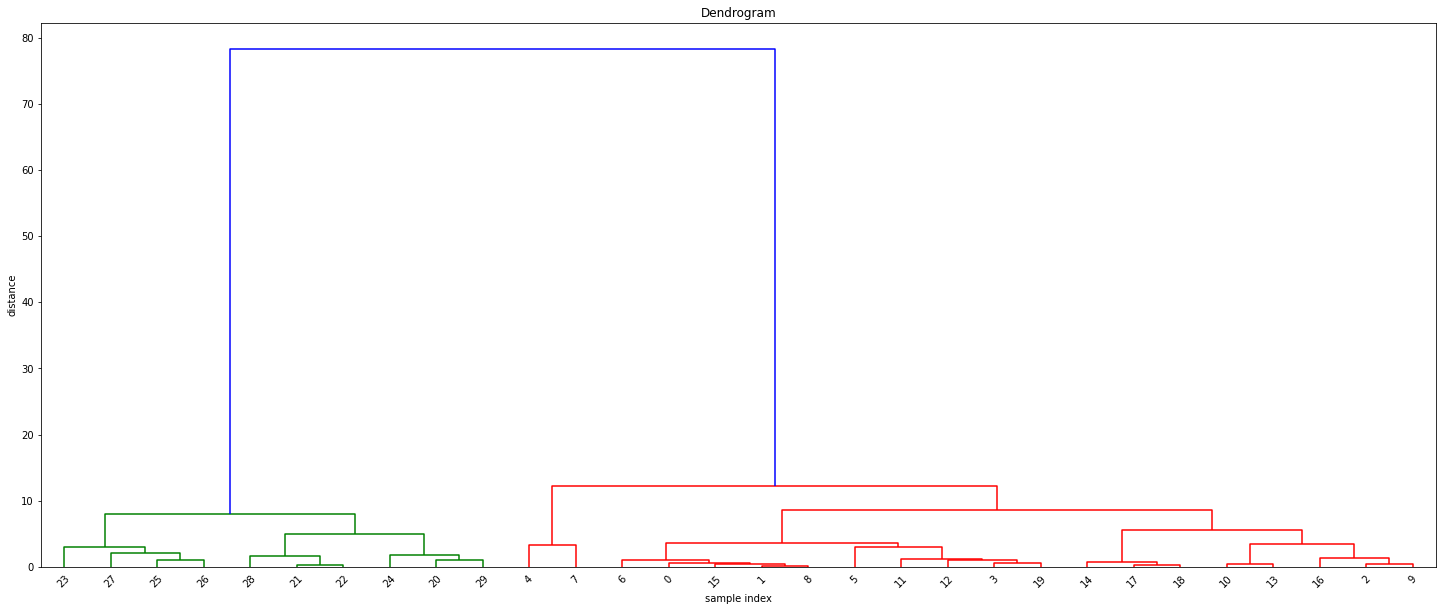

(30, 2)

In [10]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# some setting for this notebook to actually show the graphs inline, you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[20,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[10,])
X = np.concatenate((a, b),)
print (X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

# generate the linkage matrix
Z = linkage(X, 'ward')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)
plt.show()
(30, 2)


##Biclustering
Veamos un ejemplo de biclustering.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.bicluster module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


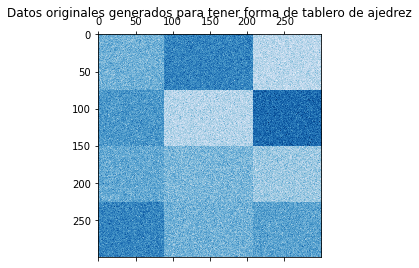

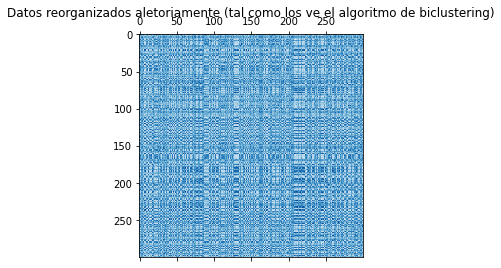

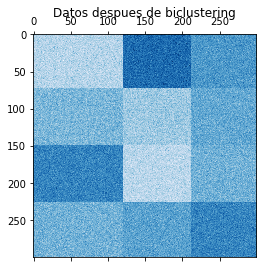

In [11]:
%matplotlib inline
# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import consensus_score

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Datos originales generados para tener forma de tablero de ajedrez")

data, row_idx, col_idx = sg._shuffle(data, random_state=0)
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Datos reorganizados aletoriamente (tal como los ve el algoritmo de biclustering)")

model = SpectralBiclustering(n_clusters=n_clusters, method='log',
                             random_state=0)
model.fit(data)
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("Datos despues de biclustering")

plt.show()
